In [ ]:
!pip install gymnasium ale-py
!sudo apt-get install -y xvfb python-opengl x11-utils > /dev/null
!pip install gymnasium[atari] pyvirtualdisplay > /dev/null

E: Unable to locate package python-opengl


In [ ]:
import gymnasium as gym
import ale_py
import matplotlib.pyplot as plt
from IPython import display as ipythondisplay
import numpy as np

In [ ]:
# Criar ambiente
env = gym.make("ALE/Freeway-v5", render_mode="rgb_array")

# Resetar o ambiente para obter o estado inicial
obs, info = env.reset()

# Obter valores da RAM
ram = env.unwrapped.ale.getRAM()

print("Tamanho da RAM:", len(ram))  # Deve imprimir 128
print("Conteúdo da RAM:", ram)       # Ver os valores atuais

env.close()


Tamanho da RAM: 128
Conteúdo da RAM: [  0   0 132   0  15  15   0 255  74  30  12   6   0   8   6   6 255 255
   7   7  26   0 255  80  64  48  32  16  16  32  48  64  80   1   1   1
   1   1   0   0   0   0   0  96  96  96  96  96  96  96  96  96  96  80
  80  80  80  80  80  80  80  80  80  80  80  80  80  80  80  80  80  80
  80  80  80  80  80  26 216  68 136  36 130  74  18 220  66 189 247  80
 247  80 247  80 247  80 247   0 247   0 247   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0  96   0   0   0   0   0  87 246
  75 244]


In [ ]:
for _ in range(10):
    env.step(env.action_space.sample())  # Executa ação aleatória
    ram = env.unwrapped.ale.getRAM()
    print(f"Posição do frango: {ram[14]}")
    print(f"Posições dos carros: {ram[108:118]}")
    print(f"posicao X frango: {ram[25]}")


Posição do frango: 6
Posições dos carros: [  1   1   1   2   3 156 158 158 159 159]
posicao X frango: 48
Posição do frango: 6
Posições dos carros: [  2   2   3   4   7 152 156 157 158 158]
posicao X frango: 48
Posição do frango: 6
Posições dos carros: [  3   3   4   6  11 148 154 156 157 157]
posicao X frango: 48
Posição do frango: 6
Posições dos carros: [  3   4   5   8  15 144 152 154 156 156]
posicao X frango: 48
Posição do frango: 6
Posições dos carros: [  4   5   7  10  19 140 150 153 155 156]
posicao X frango: 48
Posição do frango: 10
Posições dos carros: [  5   6   8  12  23 136 148 152 154 155]
posicao X frango: 48
Posição do frango: 10
Posições dos carros: [  6   7   9  14  27 132 146 150 153 154]
posicao X frango: 48
Posição do frango: 6
Posições dos carros: [  7   8  11  16  31 128 144 149 152 153]
posicao X frango: 48
Posição do frango: 6
Posições dos carros: [  7   9  12  18  35 124 142 148 151 152]
posicao X frango: 48
Posição do frango: 6
Posições dos carros: [  8  10  1

In [ ]:
class FreewayRAMWrapper(gym.ObservationWrapper):
    def __init__(self, env):
        super().__init__(env)
        self.observation_space = gym.spaces.Box(low=0, high=255, shape=(9,), dtype=np.uint8)

    def observation(self, obs):
        ram = self.env.unwrapped.ale.getRAM()
        player_pos = ram[14]  # Posição do frango
        car_positions_x = ram[108:118]  # Posições dos carros

        return np.array([player_pos] + car_positions_x.tolist(), dtype=np.uint8)

# Testar o wrapper
env = gym.make("ALE/Freeway-v5", render_mode="rgb_array")
env = FreewayRAMWrapper(env)

obs, _ = env.reset()
print("Estado formatado:", obs)

env.close()


Estado formatado: [6 0 0 0 0 0 0 0 0 0 0]


In [ ]:
env = gym.make("ALE/Freeway-v5", render_mode="rgb_array")
env = FreewayRAMWrapper(env)
obs, info = env.reset()


for time in range(500):
  if time in [0,1,2,3,4]:
    action = 1
  else:
    action = 0
  #action = env.action_space.sample()
  print(f"ação: {action}")
  obs, reward, terminated, truncated, info = env.step(action)
  index = 0
  for ram_item in obs:
    if ram_item in range(38,51):
      print(ram_item, index)
    index += 1
  if terminated or truncated:
      obs, info = env.reset()
env.close()

#player_pos_x = ram[25] = 48?

ação: 1
ação: 1
ação: 1
ação: 1
ação: 1
ação: 0
ação: 0
ação: 0
ação: 0
ação: 0
39 5
ação: 0
43 5
ação: 0
47 5
ação: 0
ação: 0
ação: 0
ação: 0
ação: 0
ação: 0
ação: 0
38 4
ação: 0
40 4
ação: 0
42 4
ação: 0
44 4
ação: 0
46 4
ação: 0
48 4
ação: 0
50 4
ação: 0
ação: 0
ação: 0
48 6
ação: 0
39 3
44 6
ação: 0
40 3
40 6
ação: 0
41 3
ação: 0
43 3
ação: 0
44 3
ação: 0
45 3
ação: 0
47 3
ação: 0
48 3
ação: 0
49 3
ação: 0
38 2
ação: 0
39 2
ação: 0
40 2
ação: 0
41 2
ação: 0
42 2
ação: 0
43 2
ação: 0
44 2
ação: 0
45 2
ação: 0
46 2
ação: 0
38 1
47 2
ação: 0
39 1
48 2
ação: 0
39 1
49 2
ação: 0
40 1
50 2
39 5
ação: 0
41 1
43 5
ação: 0
42 1
47 5
ação: 0
43 1
ação: 0
43 1
ação: 0
44 1
50 7
ação: 0
45 1
48 7
ação: 0
46 1
46 7
ação: 0
47 1
44 7
ação: 0
47 1
42 7
ação: 0
48 1
40 7
ação: 0
49 1
38 7
ação: 0
50 1
ação: 0
ação: 0
ação: 0
ação: 0
ação: 0
ação: 0
48 6
ação: 0
44 6
ação: 0
40 6
ação: 0
ação: 0
ação: 0
ação: 0
ação: 0
ação: 0
ação: 0
ação: 0
ação: 0
ação: 0
ação: 0
ação: 0
50 8
ação: 0
49 8
ação: 

In [ ]:
def verificar_coluna_colisao(obs):
  index = 0
  for enemies in obs[1:]:
    if(enemies in range(40,56)):
      return index + 1
    index += 1


In [ ]:
env = gym.make("ALE/Freeway-v5", render_mode="rgb_array")
env = FreewayRAMWrapper(env)
obs, info = env.reset()

SEQ_1 = [0,1,2,3,4]
SEQ_2 = [0,1,2,3,4,5,6,7,8]
SEQ_3 = [0,1,2,3,4,5,6,7,8,9,10,11,12]
SEQ_4 = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]
SEQ_5 = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
SEQ_6 = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24]
SEQ_7 = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28]
SEQ_8 = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32]
SEQ_9 = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36]
SEQ_10 = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40]

lista_col_collision = []
lista_pos_player = []
lista_iteracao = []
previous_pos = 6
pos_player = 6
for time in range(200):
  if time in SEQ_3:
    action = 1
  else:
    action = 0
  #action = env.action_space.sample()
  print(f"ação: {action}")
  obs, reward, terminated, truncated, info = env.step(action)
  pos_player = obs[0]
  print(f"Player_y: {obs[0]} / Enemy_x : {obs[1:]} / iteração : {time}")
  if terminated or truncated:
      obs, info = env.reset()
  previous_pos = pos_player
print(f"colunas das colisões : {lista_col_collision} \n/ posição da galinha : {lista_pos_player} \n/ iteração {lista_iteracao}")
print(len(lista_col_collision), len(lista_pos_player))
env.close()
# range x: 39 a 54
#LINHA 1: 6 a 28
#LINHA 2: 29 a 42
#LINHA 3: 43 a 58
#LINHA 4: 59 a 74
#LINHA 5: 75 a 90
#LINHA 6: 90 a 106
#LINHA 7: 107 a 121
#LINHA 8: 122 a 137
#LINHA 9: 138 a 154
#LINHA 10: 155 a 211

#player_x = 45 +- 4 -> frame skip in v5

ação: 1
Player_y: 10 / Enemy_x : [  1   1   1   2   3 156 158 158 159 159] / iteração : 0
ação: 1
Player_y: 14 / Enemy_x : [  2   2   3   4   7 152 156 157 158 158] / iteração : 1
ação: 1
Player_y: 18 / Enemy_x : [  3   3   4   6  11 148 154 156 157 157] / iteração : 2
ação: 1
Player_y: 22 / Enemy_x : [  3   4   5   8  15 144 152 154 156 156] / iteração : 3
ação: 1
Player_y: 26 / Enemy_x : [  4   5   7  10  19 140 150 153 155 156] / iteração : 4
ação: 1
Player_y: 30 / Enemy_x : [  5   6   8  12  23 136 148 152 154 155] / iteração : 5
ação: 1
Player_y: 34 / Enemy_x : [  6   7   9  14  27 132 146 150 153 154] / iteração : 6
ação: 1
Player_y: 38 / Enemy_x : [  7   8  11  16  31 128 144 149 152 153] / iteração : 7
ação: 1
Player_y: 42 / Enemy_x : [  7   9  12  18  35 124 142 148 151 152] / iteração : 8
ação: 1
Player_y: 46 / Enemy_x : [  8  10  13  20  39 120 140 146 150 152] / iteração : 9
ação: 1
Player_y: 50 / Enemy_x : [  9  11  15  22  43 116 138 145 149 151] / iteração : 10
ação: 1
P

In [ ]:
faixas = {
    1: list(range(6, 29)),
    2: list(range(29, 43)),
    3: list(range(43, 59)),
    4: list(range(59, 75)),
    5: list(range(75, 91)),
    6: list(range(90, 107)),
    7: list(range(107, 122)),
    8: list(range(122, 138)),
    9: list(range(138, 155)),
    10: list(range(155, 211))
}

In [ ]:
def verify_car_lane(pos_chicken):
  index = 0
  for pos_car in faixas.values():
    if pos_chicken in pos_car:
      return index
    index += 1
def check_collision(cars, lane_pos):
  if cars[lane_pos] in list(range(39,54)):
    return True
  else:
    return False

In [ ]:
env = gym.make("ALE/Freeway-v5", render_mode="rgb_array")
env = FreewayRAMWrapper(env)
obs, info = env.reset()

lista_col_collision = []
lista_pos_player = []
lista_iteracao = []
previous_pos = 6
pos_player = 6
for time in range(80000):
  action = env.action_space.sample()
  print(f"ação: {action}")
  obs, reward, terminated, truncated, info = env.step(action)
  pos_player = obs[0]
  print(f"Player_y: {obs[0]} / Enemy_x : {obs[1:]} / iteração : {time}")
  lane_pos = verify_car_lane(obs[0])
  if previous_pos > pos_player and check_collision(obs[1:], lane_pos):
    lista_col_collision.append(lane_pos)
    lista_pos_player.append(obs[0])
    lista_iteracao.append(time)
  if terminated or truncated:
      obs, info = env.reset()
  previous_pos = pos_player
print(f"colunas das colisões : {lista_col_collision} \n/ posição da galinha : {lista_pos_player} \n/ iteração {lista_iteracao}")
print(len(lista_col_collision), len(lista_pos_player))
env.close()

A saída de streaming foi truncada nas últimas 5000 linhas.
ação: 2
Player_y: 21 / Enemy_x : [102 127  63  94  27 132  66  97  33  58] / iteração : 77502
ação: 1
Player_y: 25 / Enemy_x : [103 128  64  96  31 128  64  96  32  57] / iteração : 77503
ação: 2
Player_y: 21 / Enemy_x : [103 129  65  98  35 124  62  94  31  56] / iteração : 77504
ação: 1
Player_y: 23 / Enemy_x : [104 130  67 100  39 120  60  93  30  56] / iteração : 77505
ação: 1
Player_y: 27 / Enemy_x : [105 131  68 102  43 116  58  92  29  55] / iteração : 77506
ação: 2
Player_y: 23 / Enemy_x : [106 132  69 104  47 112  56  90  28  54] / iteração : 77507
ação: 0
Player_y: 23 / Enemy_x : [107 133  71 106  51 108  54  89  27  53] / iteração : 77508
ação: 2
Player_y: 19 / Enemy_x : [107 134  72 108  55 104  52  88  26  52] / iteração : 77509
ação: 1
Player_y: 21 / Enemy_x : [108 135  73 110  59 100  50  86  25  52] / iteração : 77510
ação: 0
Player_y: 22 / Enemy_x : [109 136  75 112  63  96  48  85  24  51] / iteração : 77511
a

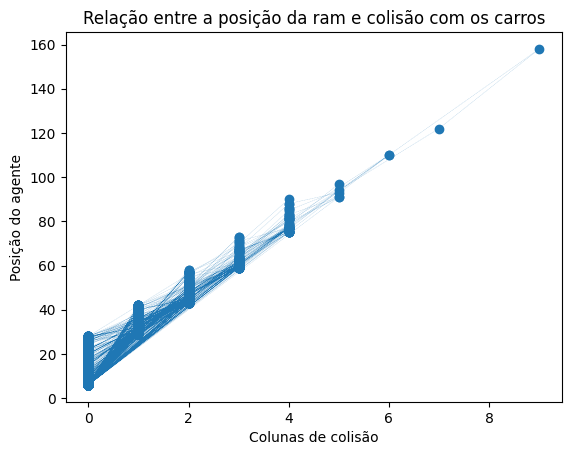

In [ ]:
plt.plot(lista_col_collision, lista_pos_player, marker='o', lw = 0.2, ls = ':')

# Adicionar rótulos
plt.xlabel('Colunas de colisão')
plt.ylabel('Posição do agente')
plt.title('Relação entre a posição da ram e colisão com os carros')
# Exibir o gráfico
plt.show()

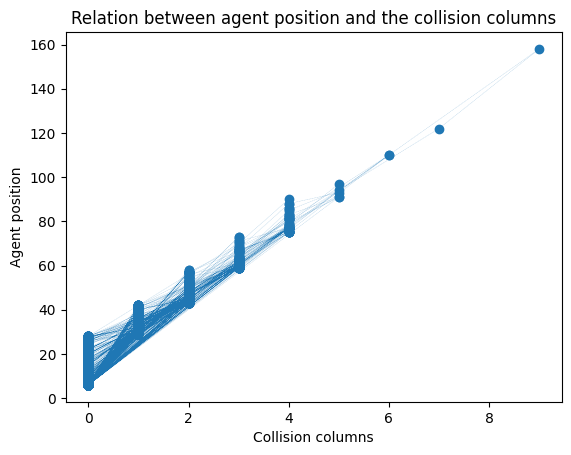

In [ ]:
plt.plot(lista_col_collision, lista_pos_player, marker='o', lw = 0.2, ls = ':')

# Adicionar rótulos
plt.xlabel('Collision columns')
plt.ylabel('Agent position')
plt.title('Relation between agent position and the collision columns')
# Exibir o gráfico
plt.show()